## Import Libraries

In [1]:
import math
import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chi2_contingency
from sklearn.naive_bayes import GaussianNB

### Loading the dataset

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')

### Size of the dataset

In [3]:
df.shape

(70000, 13)

### Displaying the first 5 rows

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Displaying the data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### Summary Statistics

In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Renaming the column name

In [7]:
cardio_df = df.rename(columns = {'id': 'ID', 'gender': 'Gender', 'height': 'Height', 'weight': 'Weight', 'ap_hi': 'AP_High', 'ap_lo': 'AP_Low', 'cholesterol': 'Cholesterol', 'gluc': 'Glucose', 'smoke': 'Smoke', 'alco': 'Alcohol', 'active': 'Physical_Activity', 'cardio': 'Cardiovascular_Disease'})
cardio_df.head()

,ID,age,Gender,Height,Weight,AP_High,AP_Low,Cholesterol,Glucose,Smoke,Alcohol,Physical_Activity,Cardiovascular_Disease
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Converting age (days) into Age (years)

In [8]:
cardio_df['Age'] = df['age'] // 365
cardio_df[['age', 'Age']].head()

,age,Age
0,18393,50
1,20228,55
2,18857,51
3,17623,48
4,17474,47


### Droping the previous age column

In [9]:
cardio_df.drop(columns=['age'], inplace=True)
cardio_df.columns

Index(['ID', 'Gender', 'Height', 'Weight', 'AP_High', 'AP_Low', 'Cholesterol',
       'Glucose', 'Smoke', 'Alcohol', 'Physical_Activity',
       'Cardiovascular_Disease', 'Age'],
      dtype='object')

## Exploratory Data Analysis (EDA)

### Checking Missing Values

In [10]:
cardio_df.isnull().sum()

ID                        0
Gender                    0
Height                    0
Weight                    0
AP_High                   0
AP_Low                    0
Cholesterol               0
Glucose                   0
Smoke                     0
Alcohol                   0
Physical_Activity         0
Cardiovascular_Disease    0
Age                       0
dtype: int64

### Checking Data Types

In [11]:
print(cardio_df.dtypes)

ID                          int64
Gender                      int64
Height                      int64
Weight                    float64
AP_High                     int64
AP_Low                      int64
Cholesterol                 int64
Glucose                     int64
Smoke                       int64
Alcohol                     int64
Physical_Activity           int64
Cardiovascular_Disease      int64
Age                         int64
dtype: object


### Checking Duplicates

In [12]:
duplicates_count = cardio_df.duplicated().sum()
print('Duplicate rows:', duplicates_count)

Duplicate rows: 0


### Data Cleaning

In [13]:
# Blood Pressure Outliers:
# 1. AP_High must be >= ap_lo
# 2. AP_High must be in a reasonable range (e.g., 60-250 mmHg)
# 3. AP_Low must be in a reasonable range (e.g., 10-180 mmHg)
initial_size = len(cardio_df)
cardio_df = cardio_df[
    (cardio_df['AP_High'] >= cardio_df['AP_Low']) &
    (cardio_df['AP_High'] >= 70) & (cardio_df['AP_High'] <= 180) &
    (cardio_df['AP_Low'] >= 30) & (cardio_df['AP_Low'] <= 120)
]

In [14]:
# Height and Weight Outliers (removing extreme values):
# 4. Height must be in a reasonable range (e.g., 130-200 cm)
# 5. Weight must be in a reasonable range (e.g., 30-150 kg)
cardio_df = cardio_df[
    (cardio_df['Height'] >= 130) & (cardio_df['Height'] <= 200) &
    (cardio_df['Weight'] >= 30) & (cardio_df['Weight'] <= 150)
]

In [15]:
print("Previous Number of rows: ", initial_size)
print ("Current Number of rows: ", len(cardio_df))
print("Number of rows removed: ", (initial_size - len(cardio_df)))

Previous Number of rows:  70000
Current Number of rows:  68243
Number of rows removed:  1757


### Calculating BMI

In [16]:
cardio_df['Heights'] = cardio_df['Height'] / 100
cardio_df['BMI'] = cardio_df['Weight'] / (cardio_df['Heights'] ** 2)

bins = [0,18.5,25,30,50]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
cardio_df['BMI_Category'] = pd.cut(cardio_df['BMI'], bins=bins, labels=labels)

cardio_df

,ID,Gender,Height,Weight,AP_High,AP_Low,Cholesterol,Glucose,Smoke,Alcohol,Physical_Activity,Cardiovascular_Disease,Age,Heights,BMI,BMI_Category
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50,1.68,21.967120,Normal
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55,1.56,34.927679,Obese
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51,1.65,23.507805,Normal
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48,1.69,28.710479,Overweight
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47,1.56,23.011177,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,52,1.68,26.927438,Overweight
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,61,1.58,50.472681,NaN
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52,1.83,31.353579,Obese
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61,1.63,27.099251,Overweight


## Correlation

### Q1: Which risk factors are most strongly associated with the presence of cardiovascular disease?

In [17]:
corr_with_cardio_df = cardio_df.drop(['Height', 'Gender','Cholesterol', 'Glucose', 'Smoke', 'Alcohol', 'Physical_Activity', 'BMI_Category'], axis=1)
corr_matrix = corr_with_cardio_df .corr()
corr = corr_matrix['Cardiovascular_Disease'].sort_values(ascending=False)

print ("Correlation Matrix Shape:", corr.shape)
print (corr)

Correlation Matrix Shape: (8,)
Cardiovascular_Disease    1.000000
AP_High                   0.434031
AP_Low                    0.340553
Age                       0.239344
BMI                       0.191715
Weight                    0.180463
ID                        0.003372
Heights                  -0.012423
Name: Cardiovascular_Disease, dtype: float64


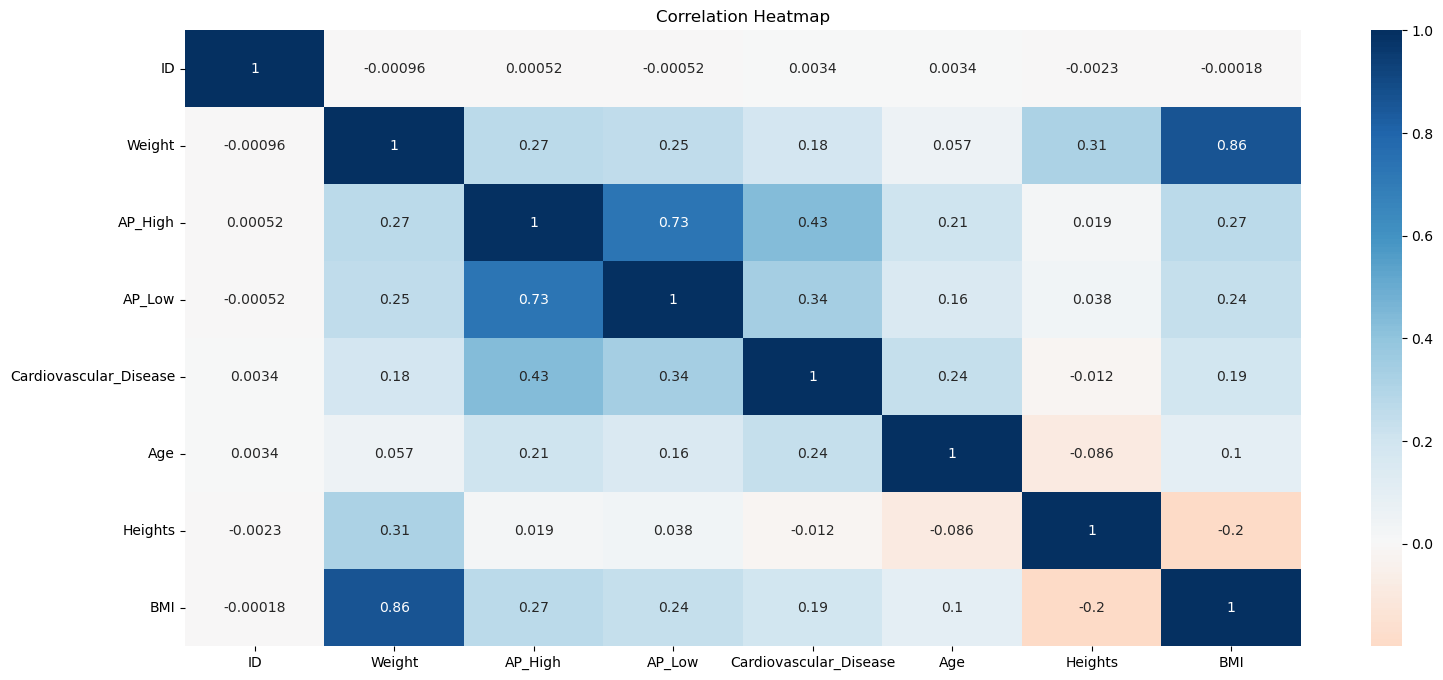

In [18]:
plt.figure(figsize=(18,8))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu", center=0)
plt.title("Correlation Heatmap")
plt.show()

### Correlation Findings (Continuous Variables vs. Cardio):
### Systolic Blood Pressure (ap_hi): Shows the strongest positive correlation (r = 0.434), as systolic pressure increases, the likelihood of cardiovascular disease rises significantly.
### Diastolic Blood Pressure (ap_lo): Has a moderate positive correlation (r = 0.341), higher diastolic pressure also corresponds with greater disease risk.
### Age (age_years): Displays a moderate positive correlation (r = 0.239), older individuals are more prone to cardiovascular disease.
### Body Mass Index (BMI): Shows a modest positive correlation (r = 0.192), higher BMI values are linked to increased disease likelihood.
### Weight: Has a weak positive correlation (r = 0.180), heavier individuals tend to show slightly higher disease risk.
### Height: Exhibits no meaningful correlation (r = –0.012), height does not influence cardiovascular disease risk.

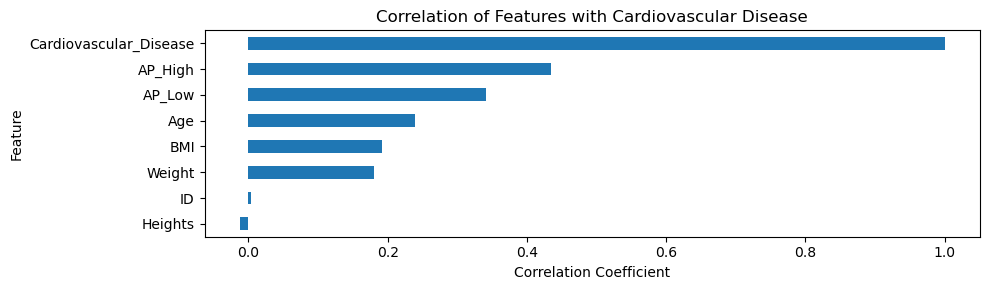

In [19]:
plt.figure(figsize=(10, 3))
corr.sort_values().plot(kind='barh')
plt.title('Correlation of Features with Cardiovascular Disease')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('cardio_correlation_bar.png')

## Lifestyle Factors Analysis

In [20]:
lifestyle_features = ['Smoke', 'Alcohol', 'Physical_Activity']

In [21]:
smoke_cardio = cardio_df.groupby('Smoke')['Cardiovascular_Disease'].mean() * 100
alcohol_cardio = cardio_df.groupby('Alcohol')['Cardiovascular_Disease'].mean() * 100
physical_activity_cardio = cardio_df.groupby('Physical_Activity')['Cardiovascular_Disease'].mean() * 100

print("Smoke:\n", smoke_cardio) 
print("Alcohol:\n", alcohol_cardio) 
print("Physical Activity:\n", physical_activity_cardio)

Smoke:
 Smoke
0    49.579157
1    46.584266
Name: Cardiovascular_Disease, dtype: float64
Alcohol:
 Alcohol
0    49.422779
1    47.419266
Name: Cardiovascular_Disease, dtype: float64
Physical Activity:
 Physical_Activity
0    53.123602
1    48.384979
Name: Cardiovascular_Disease, dtype: float64


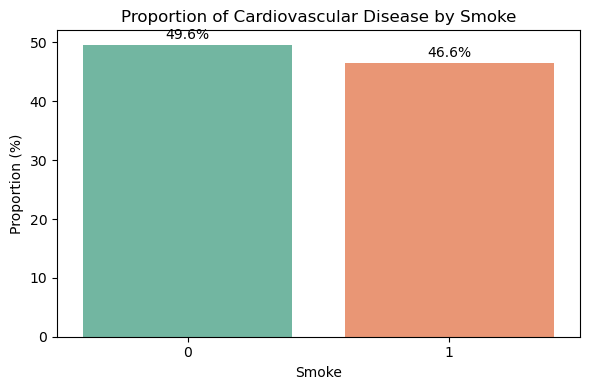

In [22]:
smoke_cardio_df = smoke_cardio.reset_index()
smoke_cardio_df.columns = ['Smoke', 'Proportion of Cardiovascular Disease'] 

plt.figure(figsize=(6,4))
ax = sns.barplot(x='Smoke', y='Proportion of Cardiovascular Disease', data=smoke_cardio_df, palette='Set2')
plt.ylabel('Proportion (%)')
plt.xlabel('Smoke')
plt.title('Proportion of Cardiovascular Disease by Smoke')
plt.xticks(rotation=0)
plt.tight_layout()

# Add percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 1,                  
        s=f'{height:.1f}%',
        ha='center'
    )
plt.show()

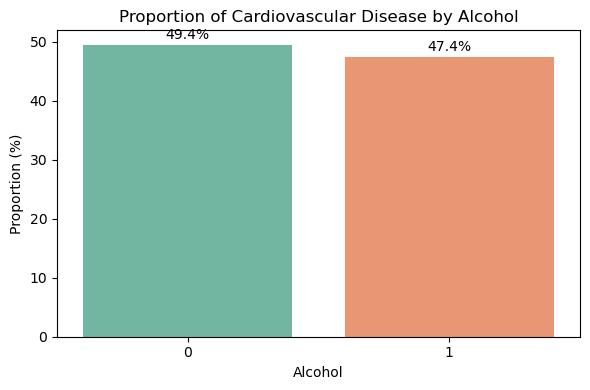

In [23]:
alcohol_cardio_df = alcohol_cardio.reset_index()
alcohol_cardio_df.columns = ['Alcohol', 'Proportion of Cardiovascular Disease'] 

plt.figure(figsize=(6,4))
ax = sns.barplot(x='Alcohol', y='Proportion of Cardiovascular Disease', data=alcohol_cardio_df, palette='Set2')
plt.ylabel('Proportion (%)')
plt.xlabel('Alcohol')
plt.title('Proportion of Cardiovascular Disease by Alcohol')
plt.xticks(rotation=0)
plt.tight_layout()

# Add percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 1,                  
        s=f'{height:.1f}%',
        ha='center'
    )
plt.show()

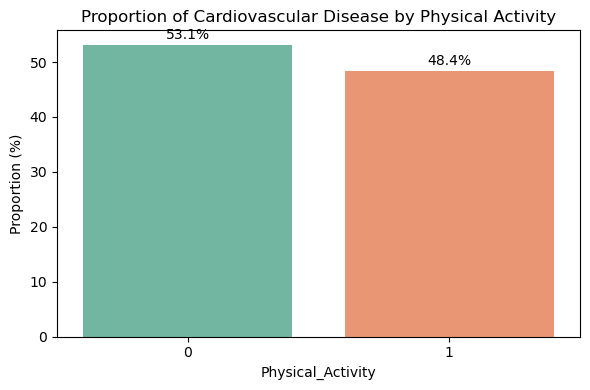

In [24]:
physical_activity_cardio_df = physical_activity_cardio.reset_index()
physical_activity_cardio_df.columns = ['Physical_Activity', 'Proportion of Cardiovascular Disease'] 

plt.figure(figsize=(6,4))
ax = sns.barplot(x='Physical_Activity', y='Proportion of Cardiovascular Disease', data=physical_activity_cardio_df, palette='Set2')
plt.ylabel('Proportion (%)')
plt.xlabel('Physical_Activity')
plt.title('Proportion of Cardiovascular Disease by Physical Activity')
plt.xticks(rotation=0)
plt.tight_layout()

# Add percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 1,                  
        s=f'{height:.1f}%',
        ha='center'
    )
plt.show()

## Demographic Variables Analysis

In [25]:
mean_age = cardio_df.groupby('Cardiovascular_Disease')['Age'].mean().round(1)
mean_age.index = mean_age.index.map({0: 'No Disease', 1: 'Disease'})
print(mean_age)

Cardiovascular_Disease
No Disease    51.2
Disease       54.5
Name: Age, dtype: float64


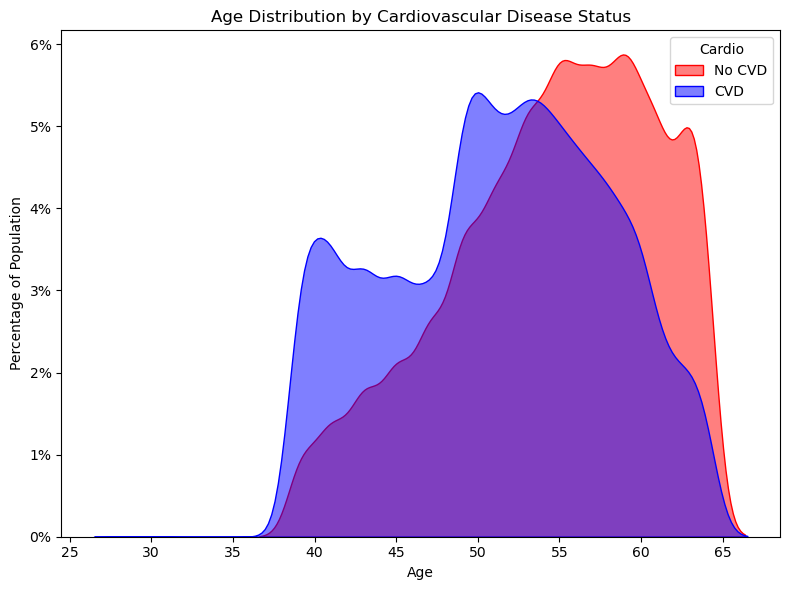

In [26]:
plt.figure(figsize=(8, 6))

sns.kdeplot(data=cardio_df, x='Age', hue='Cardiovascular_Disease', fill=True, common_norm=False, palette={0: 'blue', 1: 'red'},alpha=0.5)
# common_norm=False means compare shapes, ignore group size, common_norm=True means compare actual proportions of population, account for group size

plt.title('Age Distribution by Cardiovascular Disease Status')
plt.xlabel('Age')
plt.ylabel('Percentage of Population')
plt.legend(title='Cardio', labels=['No CVD', 'CVD'])

# Convert y-axis to percentage
plt.gca().yaxis.set_major_formatter(lambda y, _: f'{y*100:.0f}%')

plt.tight_layout()
plt.savefig('age_distribution_kde_percentage.png')
plt.show()

## Calculation of the percentage of individuals with CVD across different gender and BMI categories.

In [27]:
gender_cardio = cardio_df.groupby('Gender')['Cardiovascular_Disease'].mean() * 100
gender_cardio = gender_cardio.rename({1: 'Female', 2: 'Male'})
bmi_category_cardio = cardio_df.groupby('BMI_Category')['Cardiovascular_Disease'].mean() * 100

print("Gender:\n", gender_cardio)
print("BMI Category:\n", bmi_category_cardio)

Gender:
 Gender
Female    49.086209
Male      49.747453
Name: Cardiovascular_Disease, dtype: float64
BMI Category:
 BMI_Category
Underweight    27.244094
Normal         39.721172
Overweight     50.422190
Obese          62.254818
Name: Cardiovascular_Disease, dtype: float64


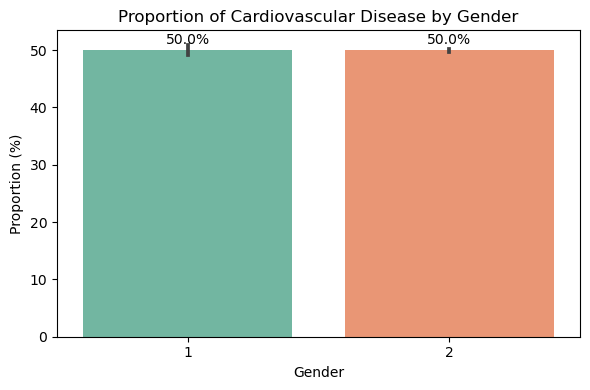

In [28]:
gender = (cardio_df.groupby('Gender')['Cardiovascular_Disease'].value_counts(normalize=True).rename('Proportion').reset_index())
gender['Proportion'] = gender['Proportion'] * 100

# Plot
plt.figure(figsize=(6,4))
ax = sns.barplot(x='Gender', y='Proportion', data=gender, palette='Set2')
plt.ylabel('Proportion (%)')
plt.xlabel('Gender')
plt.title('Proportion of Cardiovascular Disease by Gender')
plt.xticks(rotation=0)
plt.tight_layout()

# Add percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 1,                  
        s=f'{height:.1f}%',
        ha='center'
    )
plt.show()

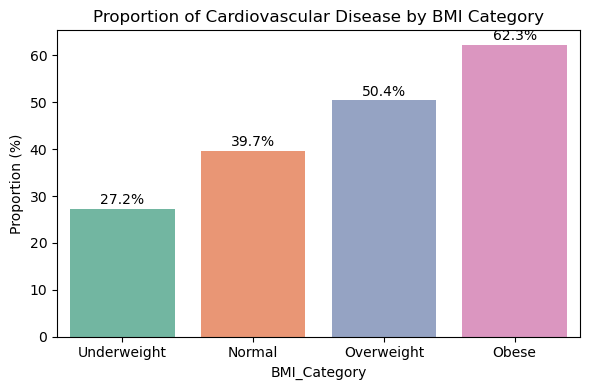

In [29]:
bmi = (cardio_df.groupby('BMI_Category')['Cardiovascular_Disease'].mean() * 100).reset_index()
bmi.columns = ['BMI_Category', 'Proportion']


# Plot
plt.figure(figsize=(6,4))
ax = sns.barplot(x='BMI_Category', y='Proportion', data=bmi, palette='Set2')
plt.ylabel('Proportion (%)')
plt.xlabel('BMI_Category')
plt.title('Proportion of Cardiovascular Disease by BMI Category')
plt.xticks(rotation=0)
plt.tight_layout()

# Add percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 1,                  
        s=f'{height:.1f}%',
        ha='center'
    )
plt.show()

## Physical vs. Medical Conditions Analysis

In [30]:
print(cardio_df.columns)

Index(['ID', 'Gender', 'Height', 'Weight', 'AP_High', 'AP_Low', 'Cholesterol',
       'Glucose', 'Smoke', 'Alcohol', 'Physical_Activity',
       'Cardiovascular_Disease', 'Age', 'Heights', 'BMI', 'BMI_Category'],
      dtype='object')


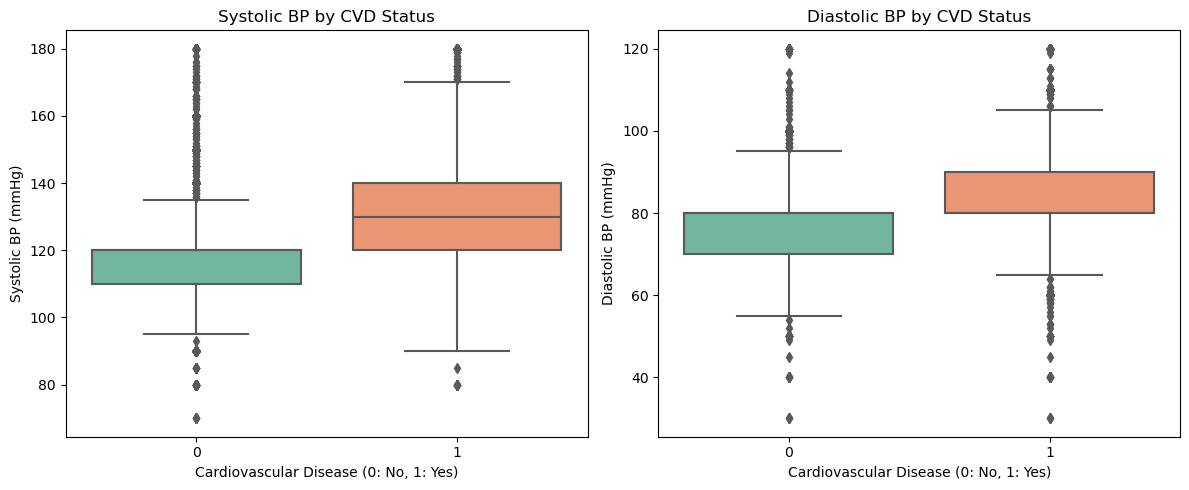

In [31]:
# boxplots to visually compare the distribution of the continuous physical conditions (ap_hi and ap_lo) between
# the two CVD groups (cardio=0 and cardio=1).

# Define blood pressure features
bp_features = ['AP_High', 'AP_Low']
bp_labels = {'AP_High': 'Systolic BP', 'AP_Low': 'Diastolic BP'}

# Create boxplots for blood pressure
plt.figure(figsize=(12, 5))
for i, feature in enumerate(bp_features):
    plt.subplot(1, 2, i + 1)

    sns.boxplot(x='Cardiovascular_Disease', y=feature, data=cardio_df, palette='Set2')

    plt.title(f'{bp_labels[feature]} by CVD Status')
    plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
    plt.ylabel(f'{bp_labels[feature]} (mmHg)')

plt.tight_layout()
plt.savefig('blood_pressure_boxplots.png')

posx and posy should be finite values
posx and posy should be finite values


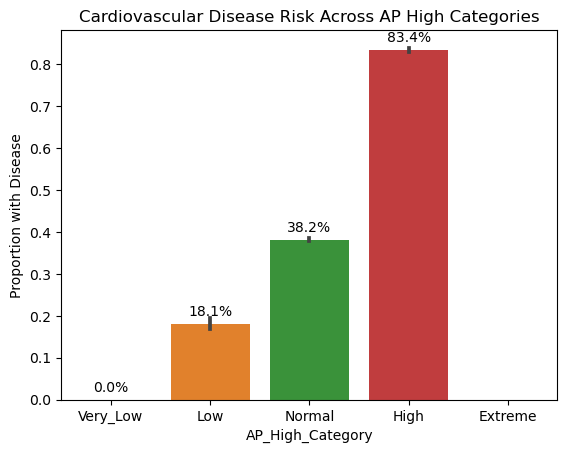

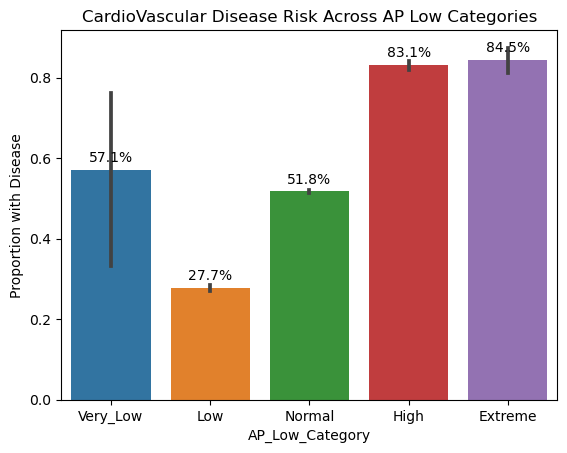

In [32]:
bins = [0, 70, 100, 130, 180, 240]
labels = ['Very_Low', 'Low', 'Normal', 'High', 'Extreme']
cardio_df['AP_High_Category'] = pd.cut(cardio_df['AP_High'], bins=bins, labels=labels)

ax = sns.barplot(x='AP_High_Category', y='Cardiovascular_Disease', data=cardio_df)
plt.ylabel('Proportion with Disease')
plt.title('Cardiovascular Disease Risk Across AP High Categories')

# Add percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 0.02,                  
        s=f'{height*100:.1f}%',
        ha='center'
    )

plt.show()

bins = [0, 40, 70, 90, 100, 200]
labels = ['Very_Low', 'Low', 'Normal', 'High', 'Extreme']
cardio_df['AP_Low_Category'] = pd.cut(cardio_df['AP_Low'], bins=bins, labels=labels)

ax = sns.barplot(x='AP_Low_Category', y='Cardiovascular_Disease', data=cardio_df)
plt.ylabel('Proportion with Disease')
plt.title('CardioVascular Disease Risk Across AP Low Categories')

# Add percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 0.02,                  
        s=f'{height*100:.1f}%',
        ha='center'
    )

plt.show()

In [33]:
glucose_cardio = cardio_df.groupby('Glucose')['Cardiovascular_Disease'].mean() * 100
glucose_cardio = glucose_cardio.rename({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})

cholesterol_cardio = cardio_df.groupby('Cholesterol')['Cardiovascular_Disease'].mean() * 100
cholesterol_cardio = cholesterol_cardio.rename({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})

print("Glucose:\n", glucose_cardio)
print("Cholesterol:\n", cholesterol_cardio)

Glucose:
 Glucose
Normal               47.426888
Above Normal         58.518075
Well Above Normal    61.615771
Name: Cardiovascular_Disease, dtype: float64
Cholesterol:
 Cholesterol
Normal               43.417766
Above Normal         59.463568
Well Above Normal    76.123235
Name: Cardiovascular_Disease, dtype: float64


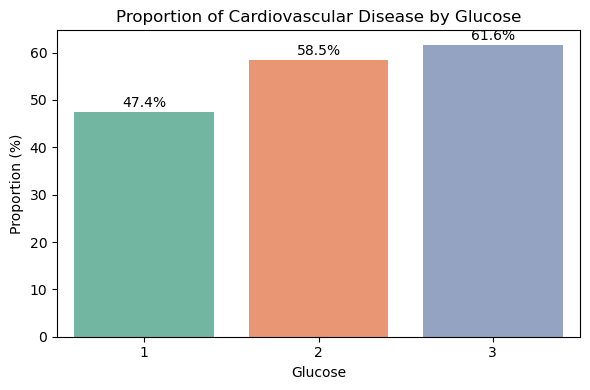

In [34]:
glucose = (cardio_df.groupby('Glucose')['Cardiovascular_Disease'].mean() * 100).reset_index()
glucose.columns = ['Glucose', 'Proportion']


# Plot
plt.figure(figsize=(6,4))
ax = sns.barplot(x='Glucose', y='Proportion', data=glucose, palette='Set2')
plt.ylabel('Proportion (%)')
plt.xlabel('Glucose')
plt.title('Proportion of Cardiovascular Disease by Glucose')
plt.xticks(rotation=0)
plt.tight_layout()

# Add percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 1,                  
        s=f'{height:.1f}%',
        ha='center'
    )
    
plt.show()

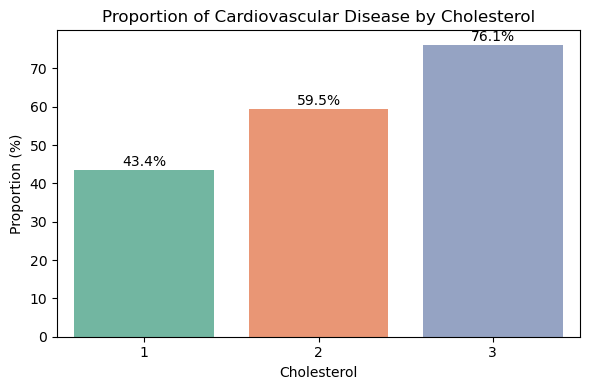

In [35]:
cholesterol = (cardio_df.groupby('Cholesterol')['Cardiovascular_Disease'].mean() * 100).reset_index()
cholesterol.columns = ['Cholesterol', 'Proportion']


# Plot
plt.figure(figsize=(6,4))
ax = sns.barplot(x='Cholesterol', y='Proportion', data=cholesterol, palette='Set2')
plt.ylabel('Proportion (%)')
plt.xlabel('Cholesterol')
plt.title('Proportion of Cardiovascular Disease by Cholesterol')
plt.xticks(rotation=0)
plt.tight_layout()

# Add percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 1,                  
        s=f'{height:.1f}%',
        ha='center'
    )
    
plt.show()

## Machine Learning Algorithm

### K-Nearest Neighbors (KNN)

In [36]:
# Feature and Target Selection 
X = cardio_df[['Age', 'Gender', 'AP_High', 'AP_Low', 'Cholesterol', 'Glucose', 'Smoke', 'BMI', 'Alcohol', 'Physical_Activity']]
y = cardio_df['Cardiovascular_Disease']

# Split data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling (MANDATORY for K-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-NN Training and Initial Evaluation (K=5)
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6996043569579447

Confusion Matrix:
 [[7403 2890]
 [3260 6920]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.72      0.71     10293
           1       0.71      0.68      0.69     10180

    accuracy                           0.70     20473
   macro avg       0.70      0.70      0.70     20473
weighted avg       0.70      0.70      0.70     20473



### Naive Bayes

In [37]:
# Feature and Target Selection
X = cardio_df[['Age', 'Gender', 'AP_High', 'AP_Low', 'Cholesterol', 'Glucose', 'Smoke', 'BMI', 'Alcohol', 'Physical_Activity']]
y = cardio_df['Cardiovascular_Disease']

# Split data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Naive Bayes Training
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = nb_classifier.predict(X_test)

print("--- Naive Bayes Classifier Evaluation ---")
print("Accuracy Score:")
print(f"{accuracy_score(y_test, y_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

--- Naive Bayes Classifier Evaluation ---
Accuracy Score:
0.7134

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.81      0.74     10293
           1       0.76      0.61      0.68     10180

    accuracy                           0.71     20473
   macro avg       0.72      0.71      0.71     20473
weighted avg       0.72      0.71      0.71     20473



## Logistic Regression

In [38]:
# Feature and Target Selection
X = cardio_df[['Age', 'Gender', 'AP_High', 'AP_Low', 'Cholesterol', 'Glucose', 'Smoke', 'BMI', 'Alcohol', 'Physical_Activity']]
y = cardio_df['Cardiovascular_Disease']

# Split data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Prediction and Evaluation
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7267620768817467

Confusion Matrix:
 [[8125 2168]
 [3426 6754]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     10293
           1       0.76      0.66      0.71     10180

    accuracy                           0.73     20473
   macro avg       0.73      0.73      0.73     20473
weighted avg       0.73      0.73      0.73     20473



## Decision Tree Classifier

In [39]:
# Feature and Target Selection
X = cardio_df[['Age', 'Gender', 'AP_High', 'AP_Low', 'Cholesterol', 'Glucose', 'Smoke', 'BMI', 'Alcohol', 'Physical_Activity']]
y = cardio_df['Cardiovascular_Disease']

# Split data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Decision Tree Classifier Training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy using all features: {accuracy:.2f}")
print(classification_report(y_test, y_pred,target_names=[str(x) for x in sorted(cardio_df['Cardiovascular_Disease'].unique())]))

Accuracy using all features: 0.64
              precision    recall  f1-score   support

           0       0.63      0.66      0.65     10293
           1       0.64      0.61      0.63     10180

    accuracy                           0.64     20473
   macro avg       0.64      0.64      0.64     20473
weighted avg       0.64      0.64      0.64     20473



## Random Forest Classifier

In [40]:
# Feature and Target Selection
X = cardio_df[['Age', 'Gender', 'AP_High', 'AP_Low', 'Cholesterol', 'Glucose', 'Smoke', 'BMI', 'Alcohol', 'Physical_Activity']]
y = cardio_df['Cardiovascular_Disease']

# Split data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier Training
rfc=RandomForestClassifier(n_estimators=30,random_state=42)
rfc.fit(X_train,y_train)

# Prediction and Evaluation
y_pred = rfc.predict(X_test)

accuracy_all=accuracy_score(y_test,y_pred)
print(f"Accuracy using all features: {accuracy:.2f}")
precision = precision_score(y_test,y_pred,average='macro')
tpr = recall_score(y_test,y_pred,average='macro')
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred,target_names=[str(x) for x in sorted(cardio_df['Cardiovascular_Disease'].unique())]))

Accuracy using all features: 0.64
              precision    recall  f1-score   support

           0       0.69      0.70      0.69     10293
           1       0.69      0.67      0.68     10180

    accuracy                           0.69     20473
   macro avg       0.69      0.69      0.69     20473
weighted avg       0.69      0.69      0.69     20473



## Comparison

In [41]:
results = {}

# Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
pred_log = nb_classifier.predict(X_test_scaled)
results['Naive Bayes'] = [accuracy_score(y_test, pred_log), precision_score(y_test, pred_log), recall_score(y_test, pred_log), f1_score(y_test, pred_log)]


# Logistic Regression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_scaled, y_train)
pred_log = log.predict(X_test_scaled)
results['Logistic Regression'] = [accuracy_score(y_test, pred_log), precision_score(y_test, pred_log), recall_score(y_test, pred_log), f1_score(y_test, pred_log)]

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
pred_knn = knn.predict(X_test_scaled)
results['KNN'] = [accuracy_score(y_test, pred_knn), precision_score(y_test, pred_knn), recall_score(y_test, pred_knn), f1_score(y_test, pred_knn)]

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
results['Decision Tree'] = [accuracy_score(y_test, pred_dt), precision_score(y_test, pred_dt), recall_score(y_test, pred_dt), f1_score(y_test, pred_dt)]

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
results['Random Forest'] = [accuracy_score(y_test, pred_rf), precision_score(y_test, pred_rf), recall_score(y_test, pred_rf), f1_score(y_test, pred_rf)]

comparison_df = pd.DataFrame(results, index=['Accuracy','Precision','Recall','F1 Score'])
print(comparison_df.T)

C:\Users\biswa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


                     Accuracy  Precision    Recall  F1 Score
Naive Bayes          0.499829   0.498499  0.978978  0.660612
Logistic Regression  0.726762   0.757005  0.663458  0.707151
KNN                  0.699604   0.705403  0.679764  0.692346
Decision Tree        0.638402   0.642454  0.615128  0.628494
Random Forest        0.688761   0.689114  0.681532  0.685302


## Key Findings:

### Blood Pressure vs. CVD: The boxplots show that individuals with CVD (Cardiovascular_Disease=1) have significantly higher median Systolic (AP_High) and Diastolic (AP_Low) blood pressure than those without the disease (Cardiovascular_Disease=0). This strongly confirms the high correlation from Q1.
### Cholesterol vs. CVD: There is a very strong, almost linear relationship between the level of cholesterol and CVD risk:
### Normal: 43.4% CVD prevalence
### Above Normal: 59.5% CVD prevalence
### Well Above Normal: 76% CVD prevalence
### Glucose vs. CVD: A similar, though slightly weaker, pattern is seen with glucose:
### Normal: 47.4% CVD prevalence
### Above Normal: 58.5% CVD prevalence
### Well Above Normal: 61.6% CVD prevalence

## Conclusion: Identifying the Most Influential Risk Factors

### Based on the exploratory data analysis, the most influential risk factors for predicting cardiovascular disease are:
### Blood Pressure (AP_High and AP_Low): Highest correlation with the target variable.
### Cholesterol Level: Shows the steepest increase in CVD prevalence across its categories (from 43.4% at Normal to 76.1% at Well Above Normal).
### Age: Older age groups have a substantially higher risk of CVD.
### Obesity (high BMI): Individuals classified as obese have the highest prevalence of CVD (62.3%) among the demographic factors, significantly higher than those with a normal BMI.
### Gender, Smoking, and Alcohol: These binary factors showed only a minimal difference (≤2%) in overall CVD prevalence
### Logistic Regression and KNN models consistently achieved an accuracy of approximately 72% and 70%. This consistency confirms that the features selected based on the EDA (AP_High, AP_Lw, Age, Cholesterol, BMI) are highly effective predictors of cardiovascular disease risk.